<a href="https://colab.research.google.com/github/Safayat-Hossain-007/bug-free-octo-computing-machine/blob/main/IT20005_ICT4103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
1) How can you implement a Python program utilizing the linear congruential method to generate a
sequence of random numbers where seed, multiplier, increment are 27, 17 and 43 respectively over
the modulo of 100.
'''
def lcg(multiplier, seed, increment, mod, n):
    """
    Generates a sequence of random numbers using the linear congruential method.

    Args:
        multiplier: The multiplier value (a).
        seed: The seed or start value (X0).
        increment: The increment value (c).
        mod: The modulus value (m).
        n: The number of random numbers to generate.

    Returns:
        A list containing the sequence of random numbers.
    """
    random_nums = []
    current_value = seed
    for _ in range(n):
        next_value = (multiplier * current_value + increment) % mod
        random_nums.append(next_value)
        current_value = next_value
    return random_nums

# Parameters for the LCG
seed = 27
multiplier = 17
increment = 43
mod = 100
n = 10

# Generate the random numbers
random_numbers = lcg(multiplier, seed, increment, mod, n)
print(random_numbers)


[2, 77, 52, 27, 2, 77, 52, 27, 2, 77]


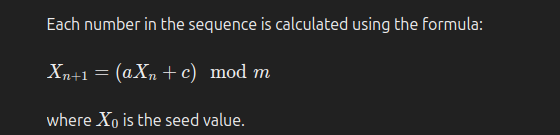

Estimated Pi: 3.141084


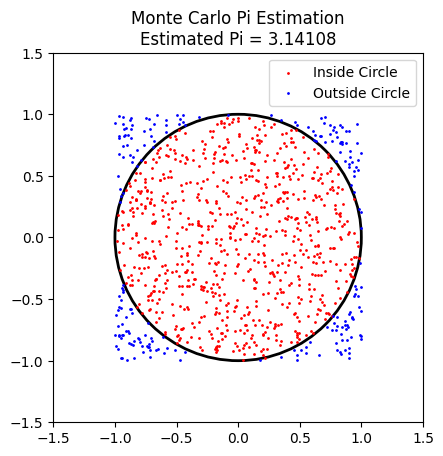

In [ ]:
'''
2) Let the paper consist of a square target with a circle drawn as below. The square target has a length
of two feet and the circular target has a radius of one foot. Estimating Pi using Monte Carlo Method
using python program.
'''

import numpy as np
import matplotlib.pyplot as plt

# Function to estimate Pi using Monte Carlo method
def estimate_pi(num_points):
    # Generate random points within the square
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)

    # Calculate distances from the origin
    distances = x**2 + y**2

    # Count points inside the unit circle
    inside_circle = np.sum(distances <= 1)

    # Estimate Pi
    pi_estimate = (inside_circle / num_points) * 4
    return pi_estimate, x, y, distances

# Number of points to generate
num_points = 1000000  # Use a large number for a good estimate

# Estimate Pi
pi_estimate, x, y, distances = estimate_pi(num_points)
print(f"Estimated Pi: {pi_estimate}")

# Plot the points for visualization
num_points_plot = 1000  # Use a smaller number for plotting
x_plot, y_plot, distances_plot = x[:num_points_plot], y[:num_points_plot], distances[:num_points_plot]

# Plotting the points
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, edgecolor='black', fill=False, linewidth=2)
ax.add_artist(circle)

# Scatter plot for the points, coloring inside and outside differently
inside_circle_points = distances_plot <= 1
ax.scatter(x_plot[inside_circle_points], y_plot[inside_circle_points], c='red', s=1, label='Inside Circle')
ax.scatter(x_plot[~inside_circle_points], y_plot[~inside_circle_points], c='blue', s=1, label='Outside Circle')

ax.set_aspect('equal', 'box')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.title(f"Monte Carlo Pi Estimation\nEstimated Pi = {pi_estimate:.5f}")
plt.legend()
plt.show()

'''
simplified one
import numpy as np
import matplotlib.pyplot as plt
import numpy


def estimate_pi(num_points):
  x = np.random.uniform(-1,1,num_points)
  y = np.random.uniform(-1,1,num_points)
  distance = x**2 + y**2
  inside_circle = np.sum(distance <= 1)
  pi_estimate = 4 * (inside_circle/num_points)
  return pi_estimate,x,y,distance

num_points = 100000
pi_estimate,x,y,distance = estimate_pi(num_points)
print("Estinated pi : ",pi_estimate)
'''


In [ ]:
'''
3) Write a python program to calculate the probability of getting a double six (2 dice) after rolling
them 24 times.
'''


import random

def roll_dice():
    """
    Simulates rolling two six-sided dice.

    Returns:
        A tuple of two integers, each representing a roll of a die.
    """
    return random.randint(1, 6), random.randint(1, 6)

def monte_carlo_simulation(trials, rolls_per_trial):
    """
    Performs a Monte Carlo simulation to estimate the probability of rolling a double six.

    Args:
        trials: The number of trials to perform.
        rolls_per_trial: The number of rolls per trial.

    Returns:
        The estimated probability of rolling at least one double six in the given number of rolls.
    """
    double_six_count = 0
    for _ in range(trials):
        for _ in range(rolls_per_trial):
            dice1, dice2 = roll_dice()
            if dice1 == 6 and dice2 == 6:
                double_six_count += 1
                break  # Exit the loop early if a double six is rolled
    return double_six_count / trials

trials = 100000
rolls_per_trial = 24

probability = monte_carlo_simulation(trials, rolls_per_trial)
print("Probability of getting a double six after 24 rolls: {:.6f}".format(probability))


The estimated probability of getting at least one double six in 24 rolls is 0.488390


In [ ]:
'''
6) There are 32 random numbers data as shown below. Write a python program and its corresponding
output to determine whether this data fit with the normal distribution or NOT. Use critical value 24%. (4)

SL RN SL RN
0 67 16 83
1 63 17 47
2 33 18 67
3 69 19 63
4 53 20 33
5 51 21 69
6 49 22 53
7 78 23 51
8 77 24 49
9 83 25 78
10 47 26 77
11 53 27 83
12 51 28 47
13 49 29 53
14 78 30
'''


import pandas as pd
import numpy as np
import statistics
df = pd.DataFrame({"SL":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29, 30],
       "RN":[67,63,33,69,53,51,49,78,77,83,47,53,51,49,78,77,83,47,67,63,33,69,53,51,49,78,77,83,47,53,51]})

#df = pd.DataFrame({"A":[1,4,7], "B":[2,5,8], "C":[3,6,9]})

#Step 1 — Order the Data
df = df.sort_values(by = "RN") #ascending = True)

# Step 2 Add a column 𝑓% (frequency) indicating how many times each number appears.
df["Frecuency"] = df['RN'].map(df['RN'].value_counts())
df = df.drop_duplicates()
# Step 3 Add Observed relative cumulative frequency column
df_2 = df
df_2["Count"] = np.arange(1, len(df_2) + 1) #using numpy to generate count from 1 to the length of dataframe
df_2["ORCF"] = df_2["Count"] / len(df) #Observed Relative Cumulative Frequency
# Step 4 Add expected relative cumulative frequency column
df_3 = df_2
mu = df_3["RN"].mean()
sd = df_3["RN"].std()
#Case 1: Calculated mean (mu) and standard deviation (sd)
normal = statistics.NormalDist(mu, sd)

#Case 2: deafult mean (mu) = 50, standard deviation (sd) = 10
# comment above line and uncomment the three lines below and see what happens
# mu = 50
# sd = 10
# normal = statistics.NormalDist(mu, sd)

df_3["ERCF"] = df_3["RN"].apply(lambda x: normal.cdf(x)) #Expected Relative Cumulative Frequency

# Step 5 Add difference column
df_4 = df_3
df_4["Difference"] = abs(df_4["ORCF"]-df_4["ERCF"])
# Step 6 Get the max of the difference
df_5 = df_4
Dn = max(df_5["Difference"])
# Step 7 Compare Critical Value (CV) of K-S vs Dn Value
cv = 0.24
if (Dn <= cv):
    print("H_0: This data FITS with a normal distribution N("+str(mu)+","+str(sd)+")")
else:
    print("H_1: This data DO NOT fits with a normal distribution N("+str(mu)+","+str(sd)+")")

H_0: This data FITS with a normal distribution N(60.70967741935484,14.760744218787655)


In [ ]:
'''
7) Write a python program to calculate the probability of dying a given number of fishes in a given
year where data for the average number of fishes and estimated number of fishes will be taken as
input. Your program should have function that solves the poisson distribution equation and return the
value. The output should match the following format and complete the missing value (upto 6 digit
after the decimal) based on the program.
Input (average and estimated value) Output (Poisson Probability)
Case 1: 250, 275 0.007169
Case 2: 300, 350 ?
Case 3: 100, 150 ?
'''

import math

def poisson_probability(average, k):
    """
    Calculates the probability of k events occurring given an average rate of lambda events.

    Args:
        average: The average number of events (fish deaths) per year.
        k: The number of events (fish deaths) to calculate the probability for.

    Returns:
        The probability of k events occurring.
    """
    e = math.exp(-average)  # Calculate e raised to the power of -average
    return (average**k / math.factorial(k)) * e  # Poisson probability formula

# Input cases
cases = [
    (250, 275),
    (300, 350),
    (100, 150)
]

# Calculate and display probabilities
for average, estimated in cases:
    probability = poisson_probability(average, estimated)
    print(f"Case: Average {average}, Estimated {estimated} (Probability: {probability:.6f})")


Case: Average 250, Estimated 275 (Known Probability: 0.007169)
Case: Average 300, Estimated 350 (Probability: 0.000409)
Case: Average 100, Estimated 150 (Probability: 0.000001)


In [ ]:
'''
9) Convert each individual data value into a z-score purposing to transform the Normal Distribution of
this data into the Standard Normal Distribution. Calculate the mean and standard deviation using
these data and use that to replace the '?' mark in the following the z-score dataframe.

df_z_score = pd.DataFrame({"Data":[3, 4, 5, 6, 7, 8, 8, 8, 8, 8, 9, 9, 7, 6, 6, 5, 4, 4, 3, 2],
"Z-score":[-1.39,-0.93, 0.93, ? , ? , ? , ? , ? , ? , ? , ? , ? , ? , ? , ? , ? , ? , -0.93,-1.39, -1.86]})
'''
import pandas as pd
df = pd.DataFrame({"Data":[3, 4, 5, 6, 7, 8, 8, 8, 8, 8, 9, 9, 7, 6, 6, 5, 4, 4, 3, 2]})

mean = df["Data"].mean()
std = df["Data"].std()

df["Z-score"] = (df["Data"] - mean)/std
print(df)

    Data   Z-score
0      3 -1.393981
1      4 -0.929320
2      5 -0.464660
3      6  0.000000
4      7  0.464660
5      8  0.929320
6      8  0.929320
7      8  0.929320
8      8  0.929320
9      8  0.929320
10     9  1.393981
11     9  1.393981
12     7  0.464660
13     6  0.000000
14     6  0.000000
15     5 -0.464660
16     4 -0.929320
17     4 -0.929320
18     3 -1.393981
19     2 -1.858641


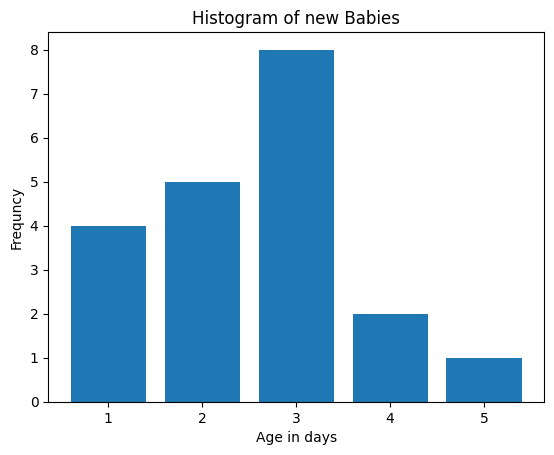

In [ ]:
'''
10) Suppose there are 20 newborn babies in a hospital whose ages in increasing order are as
follows:
ages = [1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5]
Write a python program to count the given age values and construct the frequency distribution
table and plot the histogram with x-axis shows the Age in days and y-axis shows the frequency.
'''

import numpy as np
import matplotlib.pyplot as plt

ages = [1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5]

unique_ages,counts = np.unique(ages,return_counts=True)

plt.bar(unique_ages,counts)
plt.xlabel("Age in days")
plt.ylabel("Frequncy")
plt.title("Histogram of new Babies")
plt.show()